In [1]:
import datetime as dt
import pandas as pd 
import numpy as np
from pathlib import Path
import sklearn.neural_network as skl_nn
import matplotlib.pyplot as plt
import sklearn.linear_model as skllm
import sklearn.model_selection as skl_ms
import scipy.stats as sps
import math

#### Problem 4.1

In [5]:
def exchange(r,n):
    out = n*((1+r)**(1/n)-1)
    print("{} periods => {}%".format(n,round(out*100,2)))

for i in [2,4,12,52,365]:
    exchange(0.13,i)

2 periods => 12.6%
4 periods => 12.41%
12 periods => 12.28%
52 periods => 12.24%
365 periods => 12.22%


#### Problem 4.2(d)

In [2]:
def PortA_yieldchange(n):
    o = 0.1
    Vn = 2000*np.exp(-o-n)+6000*np.exp((-o-n)*10)
    V0 = 2000*np.exp(-o)+6000*np.exp(-o*10)
    return np.abs(Vn-V0)*100/V0
def PortB_yieldchange(n):
    o = 0.1
    Vn = 5000*np.exp((-o-n)*5.95)
    V0 = 5000*np.exp((-o)*5.95)
    return np.abs(Vn-V0)*100/V0


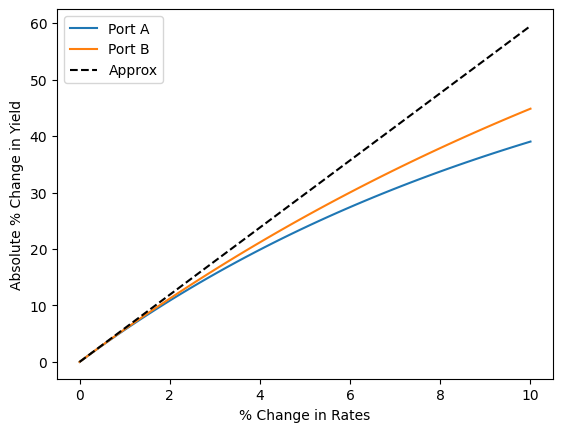

In [29]:
Out = pd.DataFrame(np.linspace(0,10)/100,columns=["yield change"])
PA = Out.apply(PortA_yieldchange)
PB = Out.apply(PortB_yieldchange)
Out["Port A"] = PA
Out["Port B"] = PB
Out["Approx"] = Out["yield change"]*5.95*100
Out["yield change"]*=100
Out.set_index("yield change",inplace=True)
plt.plot(Out["Port A"])
plt.plot(Out["Port B"])
plt.plot(Out["Approx"],"k--")

plt.xlabel("% Change in Rates")
plt.ylabel("Absolute % Change in Yield")
plt.legend(["Port A","Port B","Approx"])

#### Problem 5.1(a) 

Text(0.5, 0, 'Maturity')

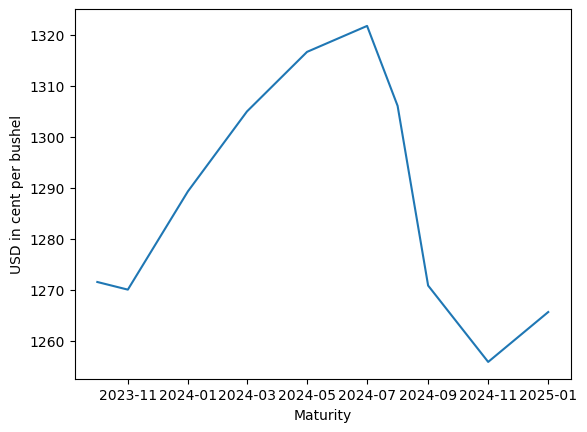

In [22]:
yH = [1277.0,1274.4,1293.6,1309.4,1321.0,1325.6,1309.0,1274.0,1259.2,1266.0]
yL = [1266.0,1265.6,1285.0,1300.6,1312.4,1318.0,1303.2,1267.6,1252.4,1265.2]
index = pd.to_datetime(["10/2023","11/2023","1/2024","03/2024","05/2024","07/2024","08/2024","09/2024","11/2024","01/2025"])

Data = pd.DataFrame(index= index, columns=["High","Low"])

Data["High"] = yH
Data["Low"] = yL
Data["HL Average"] = (Data["High"]+Data["Low"])/2
#Data["Volume"] = [25810,10192,4383,2417,1727,326,174,1065,35]
plt.plot(Data["HL Average"])
plt.ylabel("USD in cent per bushel")
plt.xlabel("Maturity")